In [1]:
#Importing relevant libraries for analysis
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/escadesupremo/NBA_SALARIES/master/salaries_1985to2018.csv") #Creating dataframe from existing CSV
data.tail(3) #Sampling dataframe



,league,player_id,salary,season,season_end,season_start,team
14160,NBA,zizican01,1645200,2017-18,2018,2017,Cleveland Cavaliers
14161,NBA,zubaciv01,1034956,2016-17,2017,2016,Los Angeles Lakers
14162,NBA,zubaciv01,1312611,2017-18,2018,2017,Los Angeles Lakers


In [3]:
#Applying float and integer on currently string attributes
data['salary'] = data['salary'].apply(int)
data['season_start'] = data['season_start'].apply(int)
#Grouping data based on season start for analysis
group = data.groupby('season_start')
#Determining median salary for each season in NBA
df2 = group.apply(lambda x: x['salary'].unique())
df2 = df2.apply(pd.Series)
df2['Median Salary'] = df2.median(axis=1)
df2 = df2.reset_index()
df2 = df2[['season_start', 'Median Salary']]
#Show data
df2


,season_start,Median Salary
0,1984,366000.0
1,1985,350000.0
2,1986,470833.5
3,1987,415625.0
4,1988,545850.0
5,1989,1800000.0
6,1990,802500.0
7,1991,941000.0
8,1992,1104000.0
9,1993,1364000.0


In [4]:
#Using LinearRegression, we determine the how much the median salary in the NBA will likely be until 2030.
X = np.array(df2)[:,0].reshape(-1,1)
y = np.array(df2)[:,1].reshape(-1,1)

to_predict_x= [2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
to_predict_x= np.array(to_predict_x).reshape(-1,1)

regsr=LinearRegression()
regsr.fit(X,y)

predicted_y= regsr.predict(to_predict_x)
m= regsr.coef_
c= regsr.intercept_
print("Year on Year Increase for the Median NBA Salary",predicted_y)


Year on Year Increase for the Median NBA Salary [[3661604.91711229]
 [3753289.1669977 ]
 [3844973.41688311]
 [3936657.66676852]
 [4028341.91665393]
 [4120026.16653934]
 [4211710.41642475]
 [4303394.66631016]
 [4395078.91619557]
 [4486763.16608098]
 [4578447.41596639]
 [4670131.6658518 ]
 [4761815.91573721]]


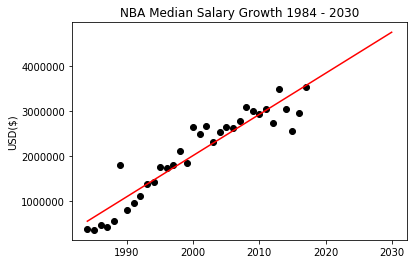

In [5]:
%matplotlib inline
plt.title('NBA Median Salary Growth 1984 - 2030')  
plt.ylabel('USD($)') 
plt.scatter(X,y,color="black")
new_y=[ m*i+c for i in np.append(X,to_predict_x)]
new_y=np.array(new_y).reshape(-1,1)
plt.plot(np.append(X,to_predict_x),new_y,color="red")
plt.show()

In [6]:
data = data[['season_start', 'salary', 'player_id']]
group = data.groupby('season_start')

df2 = group.apply(lambda x: x['salary'].unique())
df2 = df2.apply(pd.Series)
df2['salary'] = df2.max(axis=1)
df2 = df2.reset_index()
df2 = df2[['season_start', 'salary']]
df2 = df2.merge(data, on=['season_start', 'salary'])
df2.head(3)

,season_start,salary,player_id
0,1984,2500000.0,johnsma02
1,1985,2500000.0,johnsma02
2,1986,1800000.0,birdla01


In [7]:
players = pd.read_csv('https://query.data.world/s/ia5q54ezsyyanmr52eekgz4ybzk7jn') #create dataframe containing player names
players.tail(1) #Sample data

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
4684,zunicma01,"December 19, 1919","Renton, Pennsylvania",0.9,30.3,NaN,70.6,56,-,4.9,...,NaN,1947 BAA Draf,Washington Capitols,NaN,6-3,NaN,Matt Zunic,Guard/Forward,Right,195lb


In [8]:
#Cutting everything else not needed on the frame.
players = players[['_id', 'name']]
players = players.rename(columns={"_id": "player_id"})
df2 = df2.merge(players, on=['player_id'])
df2 = df2[['season_start', 'salary', 'name']]
df2

,season_start,salary,name
0,1984,2500000.0,Magic Johnson
1,1985,2500000.0,Magic Johnson
2,1986,1800000.0,Larry Bird
3,1991,7070000.0,Larry Bird
4,1987,2750000.0,Patrick Ewing
5,1988,3250000.0,Patrick Ewing
6,1989,3750000.0,Patrick Ewing
7,1990,4250000.0,Patrick Ewing
8,1995,18724000.0,Patrick Ewing
9,1998,18500000.0,Patrick Ewing


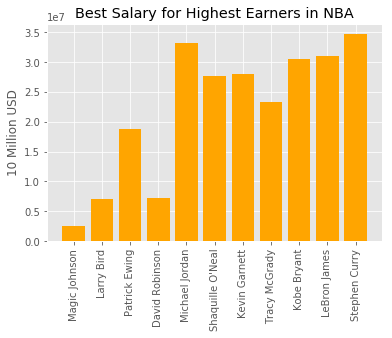

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.bar(df2['name'], df2['salary'], color='orange')
plt.ylabel("10 Million USD")
plt.title("Best Salary for Highest Earners in NBA")

plt.xticks(rotation='vertical')

plt.show()

In [11]:
#Using LinearRegression, we determine the how much the highest paid player will likely be making by 2030
X = np.array(df2)[:,0].reshape(-1,1)
y = np.array(df2)[:,1].reshape(-1,1)

to_predict_x= [2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
to_predict_x= np.array(to_predict_x).reshape(-1,1)

regsr=LinearRegression()
regsr.fit(X,y)

predicted_y= regsr.predict(to_predict_x)
m= regsr.coef_
c= regsr.intercept_
print("Year on Year Increase for the top NBA Salary",predicted_y)

Year on Year Increase for the top NBA Salary [[34233564.29411769]
 [35143676.40336132]
 [36053788.51260495]
 [36963900.62184882]
 [37874012.73109245]
 [38784124.84033608]
 [39694236.94957972]
 [40604349.05882359]
 [41514461.16806722]
 [42424573.27731085]
 [43334685.38655448]
 [44244797.49579835]
 [45154909.60504198]]


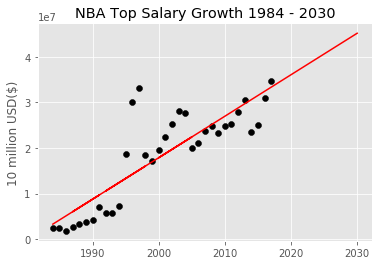

In [12]:
#And the visualization
%matplotlib inline
plt.title('NBA Top Salary Growth 1984 - 2030')  
plt.ylabel('10 million USD($)') 
plt.scatter(X,y,color="black")
new_y=[ m*i+c for i in np.append(X,to_predict_x)]
new_y=np.array(new_y).reshape(-1,1)
plt.plot(np.append(X,to_predict_x),new_y,color="red")
plt.show()